In [22]:
import numpy as np
import pandas as pd
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
def remove_mentions(text):
    return re.sub(r'@\w+', '', text)

In [3]:
def remove_urls(text):
    return re.sub(r'http\S+|www.\S+', '', text)

In [4]:
def find_hashtags(text):
    return [word for word in text.split() if word.startswith('#')]

In [5]:
def remove_hashtags(text):
    return re.sub(r'#\w+', '', text)

In [6]:
def remove_code(text):
    return ''.join(char for char in text if ord(char) < 128)

In [7]:
def remove_number(text):
    return text.apply(lambda x: ''.join([i for i in x if not i.isdigit()]))

In [8]:
def remove_newlines(text):
    return text.replace('\n', ' ').replace('\t', ' ')

In [9]:
def remove_punctuation(text):
    return (text.str.split(rf'[{string.punctuation}]').str.join(' '))

In [10]:
def string_replace(text):
    return(text)

In [6]:
with open('Data/Spam SMS Collection.txt') as word_file:
        text = word_file.read()

In [7]:
lines = text.split('\n')

In [9]:
Category = []
Text = []

In [10]:
for line in lines:
    splits = line.split('\t')
    Category.append(splits[0])
    if len(splits) > 1:
        Text.append(splits[1])
    else:
        Text.append(None)

In [11]:
df = pd.DataFrame({'Category': Category, 'Text': Text})

In [14]:
df.head()

,Category,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df.shape

(5575, 2)

In [18]:
df.isnull().sum()

Category    0
Text        1
dtype: int64

In [19]:
df['Category'] = df['Category'].map({'ham': 0, 'spam': 1})

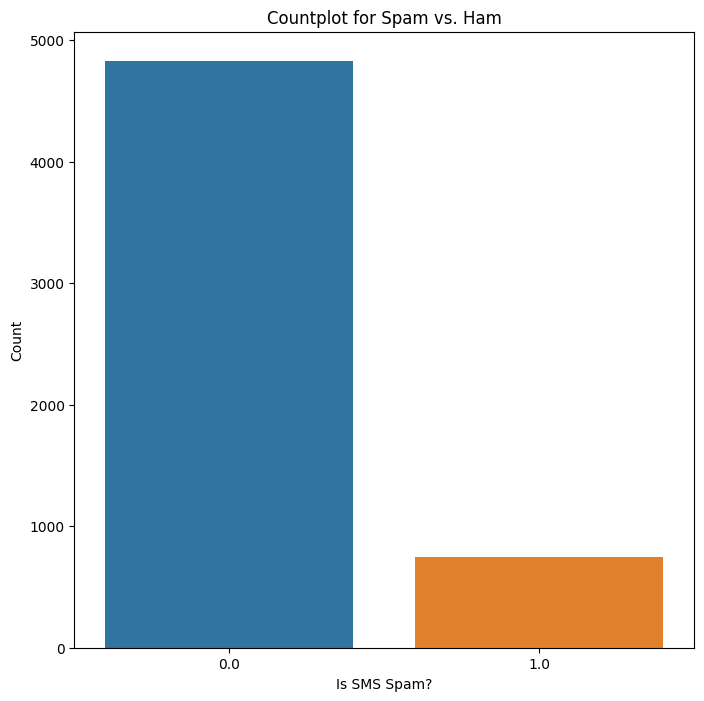

In [25]:
# Countplot for Spam vs. Ham as imbalanced dataset
plt.figure(figsize=(8,8))
g = sns.countplot(x='Category', data=df)
p = plt.title('Countplot for Spam vs. Ham')
p = plt.xlabel('Is SMS Spam?')
p = plt.ylabel('Count')

In [ ]:
print('dataset as imbalanced dataset')